In [1]:
# 交差表和透视表

In [3]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
data = pd.read_csv("./stock_day.csv")
p_change= data['p_change']

In [9]:
# 寻找星期几跟股票涨跌的关系
# 1、先根据对应的日期找到星期几
date = pd.to_datetime(data.index).weekday
data['week'] = date

# 2、把p_change按照大小分类，以0为界限
data['posi_neg'] = np.where(data['p_change'] > 0, 1, 0)

# 通过交叉表找寻两列数据的关系
count = pd.crosstab(data['week'], data['posi_neg'])

In [10]:
# 算数运算，先求和
count.sum(axis=1).astype(np.float32)

# 进行相除操作，得出比例
pro = count.div(count.sum(axis=1).astype(np.float32), axis=0)

查看效果

In [12]:
from matplotlib import pyplot as plt

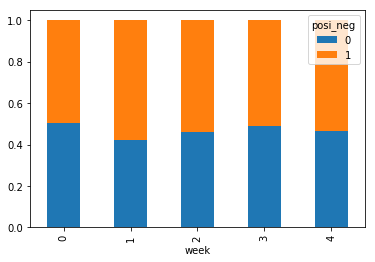

In [13]:
pro.plot(kind='bar', stacked=True)
plt.show()

### 使用pivot_table(透视表)实现

In [14]:
data.pivot_table(['posi_neg'],index=['week'])

,posi_neg
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


### 分组

> 要和聚合函数一起使用，不然没用

In [17]:
# groupby

In [18]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [19]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [20]:
# 进行分组，对颜色分组，price进行聚合

In [21]:
col.groupby(['color'])['price1'].mean()
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [ ]:
# 分组数据的结构不变

In [22]:
col.groupby(['color'],as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


星巴克零售店铺数据统计

In [24]:
# 综合案例，电影数据

In [25]:
df = pd.read_csv('./IMDB-Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [26]:
# 得出评分的平均分

In [27]:
df['Rating'].mean()

6.723200000000003

In [28]:
# 得出导演人数信息

In [32]:
np.unique(df['Director']).shape       # count?

(644,)

In [33]:
# 对于这一组电影数据，如果我们想看Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

In [34]:
# 选择分数列数据，进行plot,直接呈现画直方图

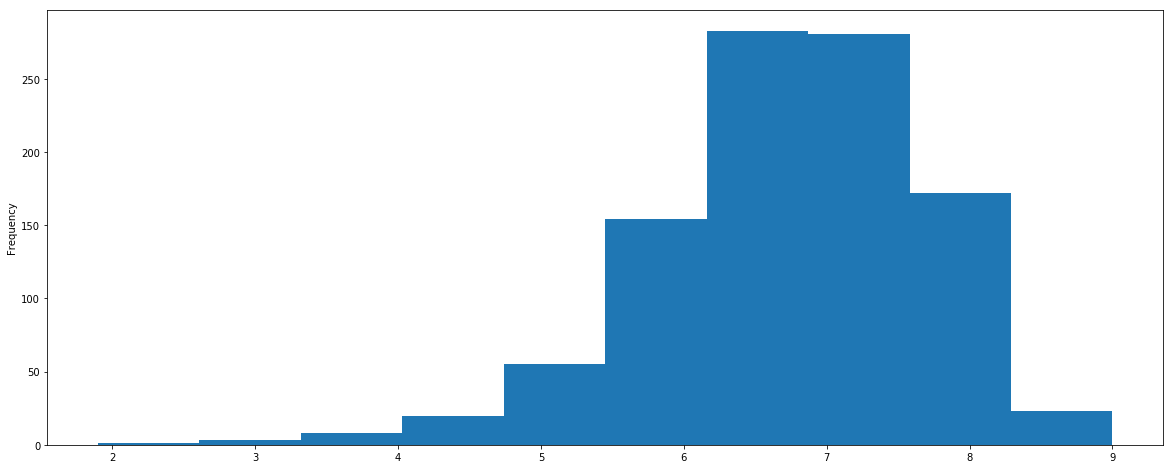

In [35]:
df['Rating'].plot(kind='hist',figsize=(20,8))

In [36]:
# Rating进行分布展示

In [40]:
# plt.figure(figsize=(20,8),dpi=80)   # 修改刻度等等在二者中间
# plt.hist(df['Rating'].values, bins=20)

(array([  1.,   0.,   2.,   1.,   2.,   6.,   7.,  13.,  15.,  40.,  78.,
         76., 156., 127., 171., 110., 117.,  55.,  20.,   3.]),
 array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
        5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
        8.29 , 8.645, 9.   ]),
 <a list of 20 Patch objects>)

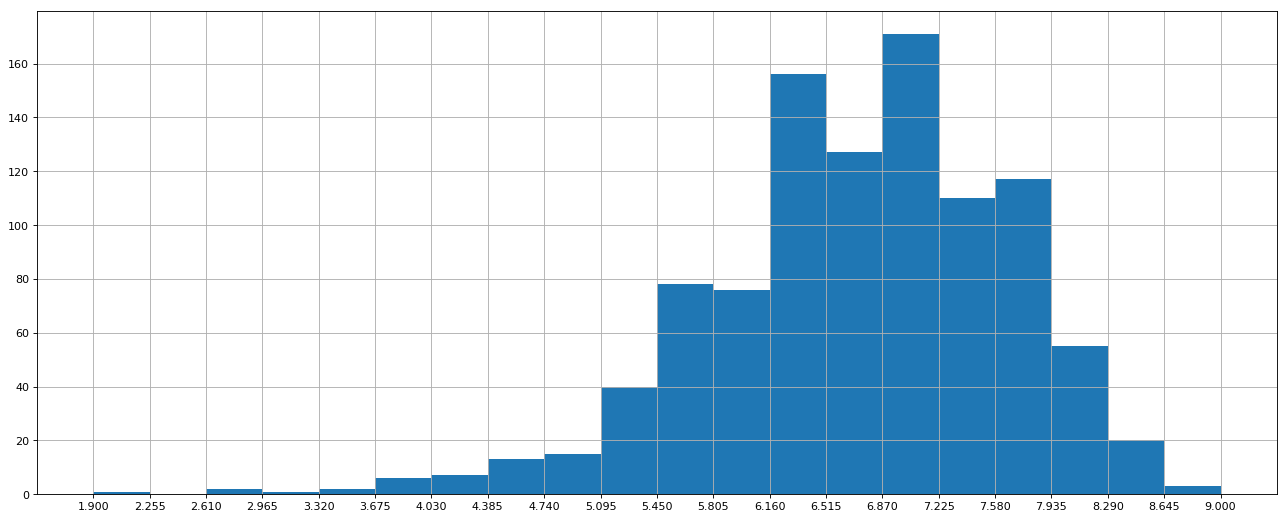

In [42]:
plt.figure(figsize=(20,8),dpi=80)

# 修改刻度
max_ = df["Rating"].max()
min_ = df["Rating"].min()
# 生成刻度列表
t1 = np.linspace(min_,max_,num=21)
# 修改刻度
plt.xticks(np.linspace(min_,max_,num=21))

# 添加网格
plt.grid()

plt.hist(df['Rating'].values, bins=20)

In [43]:
df['Genre']

0         Action,Adventure,Sci-Fi
1        Adventure,Mystery,Sci-Fi
2                 Horror,Thriller
3         Animation,Comedy,Family
4        Action,Adventure,Fantasy
5        Action,Adventure,Fantasy
6              Comedy,Drama,Music
7                          Comedy
8      Action,Adventure,Biography
9         Adventure,Drama,Romance
10       Adventure,Family,Fantasy
11        Biography,Drama,History
12        Action,Adventure,Sci-Fi
13     Animation,Adventure,Comedy
14            Action,Comedy,Drama
15     Animation,Adventure,Comedy
16        Biography,Drama,History
17                Action,Thriller
18                Biography,Drama
19           Drama,Mystery,Sci-Fi
20       Adventure,Drama,Thriller
21                          Drama
22             Crime,Drama,Horror
23     Animation,Adventure,Comedy
24        Action,Adventure,Sci-Fi
25                         Comedy
26         Action,Adventure,Drama
27                Horror,Thriller
28                         Comedy
29         Act

In [46]:
from collections import Counter
Counter(df['Genre'])

Counter({'Action': 2,
         'Action,Adventure': 3,
         'Action,Adventure,Biography': 2,
         'Action,Adventure,Comedy': 14,
         'Action,Adventure,Crime': 6,
         'Action,Adventure,Drama': 18,
         'Action,Adventure,Family': 4,
         'Action,Adventure,Fantasy': 27,
         'Action,Adventure,Horror': 2,
         'Action,Adventure,Mystery': 5,
         'Action,Adventure,Romance': 2,
         'Action,Adventure,Sci-Fi': 50,
         'Action,Adventure,Thriller': 11,
         'Action,Adventure,Western': 2,
         'Action,Biography,Crime': 1,
         'Action,Biography,Drama': 8,
         'Action,Comedy': 6,
         'Action,Comedy,Crime': 12,
         'Action,Comedy,Drama': 1,
         'Action,Comedy,Family': 1,
         'Action,Comedy,Fantasy': 3,
         'Action,Comedy,Horror': 2,
         'Action,Comedy,Mystery': 1,
         'Action,Comedy,Romance': 2,
         'Action,Comedy,Sci-Fi': 1,
         'Action,Comedy,Sport': 1,
         'Action,Crime,Drama': 17,
 

In [47]:
# 还要先把Genre 字符串分割，那个是三类
temp_list = [i.split(',') for i in df['Genre']]

In [50]:
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [55]:
genre_list = [type for li in temp_list for type in li]
genre_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [63]:
result = Counter(genre_list)
result.items()

dict_items([('Action', 303), ('Adventure', 259), ('Sci-Fi', 120), ('Mystery', 106), ('Horror', 119), ('Thriller', 195), ('Animation', 49), ('Comedy', 279), ('Family', 51), ('Fantasy', 101), ('Drama', 513), ('Music', 16), ('Biography', 81), ('Romance', 141), ('History', 29), ('Crime', 150), ('Western', 7), ('War', 13), ('Musical', 5), ('Sport', 18)])

In [69]:
# dict(result)
pd.Series(dict(result))

Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
dtype: int64

In [70]:
pd.DataFrame(dict(result))

ValueError: If using all scalar values, you must pass an index

In [71]:
ser = pd.Series(dict(result))
pd.DataFrame(ser)

,0
Action,303
Adventure,259
Animation,49
Biography,81
Comedy,279
Crime,150
Drama,513
Family,51
Fantasy,101
History,29
